In [7]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from anomalydetection import rpca
import utils.odds as odds
import os
import matplotlib.image as mpimg

In [2]:
path = './data/UCSD/UCSDped1/Test/Test001'
test_files = [file for file in os.listdir(path) if file.endswith('.tif')]

In [3]:
dataset = []
for file in test_files:
    file_path = os.path.join(path, file)
    img = mpimg.imread(file_path)
    dataset.append(img.reshape(158 * 238))

In [4]:
data = np.array(dataset)
data

array([[115, 111, 100, ..., 174, 175, 198],
       [110, 109,  98, ..., 175, 171, 199],
       [112, 112, 100, ..., 174, 174, 198],
       ...,
       [112, 111, 101, ..., 174, 171, 197],
       [115, 116,  99, ..., 176, 174, 195],
       [118, 110,  99, ..., 177, 176, 201]], dtype=uint8)

In [8]:
model = rpca.rpca(verbose=True, max_iter=100, lambda_=0.002, tau=2)
L, S = model.fit(data)

Lambda: 0.002; mu: 10479.803278688534
Iteration: 0; Current mu: 10479.803278688534
Primal: 0.0002849999159544393, Dual: 12.442124130007501
Primal tol: 1.1731229994256471, Dual tol: 0.0014092184329105384
Eps Primal: 1.4473637695529205, Eps Dual: 0.2756499885601839
Iteration: 1; Current mu: 5239.901639344267
Primal: 2.3672167960325492e-08, Dual: 12.442099460149276
Primal tol: 1.1731230998252782, Dual tol: 0.0014092096747617242
Eps Primal: 1.4473638699525515, Eps Dual: 0.2756499798020351
Iteration: 2; Current mu: 2619.9508196721335
Primal: 6.313234296887366e-08, Dual: 12.4420665618217
Primal tol: 1.173123233686264, Dual tol: 0.0014091979931743122
Eps Primal: 1.4473640038135374, Eps Dual: 0.2756499681204477
Iteration: 3; Current mu: 1309.9754098360668
Primal: 2.5255887192276e-07, Dual: 12.442000749366244
Primal tol: 1.17312350139788, Dual tol: 0.0014091746252428985
Eps Primal: 1.4473642715251533, Eps Dual: 0.2756499447525163
Iteration: 4; Current mu: 654.9877049180334
Primal: 1.01050825172

Primal: 0.7660428906048279, Dual: 0.7292924333726556
Primal tol: 1.2145632702443214, Dual tol: 0.001310184655290892
Eps Primal: 1.4888040403715948, Eps Dual: 0.27555095478256425
Iteration: 38; Current mu: 0.3198182152920085
Primal: 0.7329215773849652, Dual: 0.699064159265427
Primal tol: 1.2153917699400139, Dual tol: 0.0013005431391416677
Eps Primal: 1.4896325400672872, Eps Dual: 0.27554131326641507
Iteration: 39; Current mu: 0.3198182152920085
Primal: 0.7044206375507849, Dual: 0.6699181570467708
Primal tol: 1.2161942192665214, Dual tol: 0.0012906824943073327
Eps Primal: 1.4904349893937947, Eps Dual: 0.27553145262158074
Iteration: 40; Current mu: 0.3198182152920085
Primal: 0.6811194270039177, Dual: 0.6416725066694873
Primal tol: 1.216969754973082, Dual tol: 0.0012806821976493828
Eps Primal: 1.4912105251003553, Eps Dual: 0.27552145232492276
Iteration: 41; Current mu: 0.3198182152920085
Primal: 0.6572731042336707, Dual: 0.6148770577079377
Primal tol: 1.2177180084672456, Dual tol: 0.001270

In [9]:
images_l = L.reshape((200, 158, 238))
images_s = S.reshape((200, 158, 238))
images_x = data.reshape((200, 158, 238))

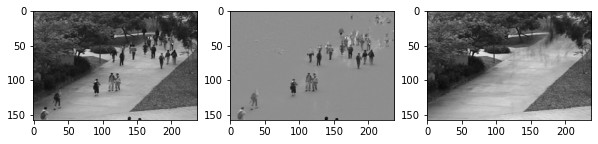

In [10]:
i = 5
fig, ax = plt.subplots(1,3, figsize=(10,5))
ax[0].imshow(images_x[i], cmap='gray')
ax[1].imshow(images_s[i], cmap='gray')
ax[2].imshow(images_l[i], cmap='gray')

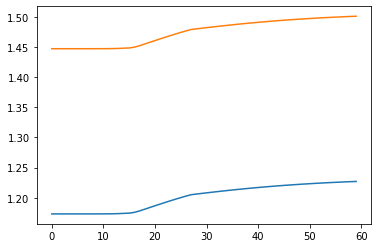

In [22]:
plt.plot(model.STATS['err_primal'])
plt.plot(model.STATS['eps_primal'])
plt.show()